In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib 
import keras
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm 
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

2023-05-01 22:08:52.840320: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [55]:
# dfdf = pd.read_csv('examine.csv')
# dfdf.head()

SEQN  BMXWT  BMXBMI  BMXWAIST  LBXGH  LBXGLU  LBXTR  LBDLDLN  MCQ160L  \
0  109271   98.8    29.7     120.4    5.6     103     84       98        0   
1  109274  103.7    30.2     109.6    5.7     154    133       52        0   
2  109290   73.0    28.1      92.0    8.4     106    102      106        0   
3  109297   55.4    23.2      73.2    5.1      92     44      124        0   
4  109300   62.0    29.6      84.8    5.4     103     50      128        0   

     KCAL  ...  water_soluble_vitamins_sum  fat_soluble_vitamins_sum  \
0  3149.5  ...                           3                        -4   
1  1843.5  ...                           0                        -2   
2  1333.0  ...                           1                        -4   
3  1526.0  ...                           1                        -4   
4   784.5  ...                          -7                        -4   

   major_minerals_sum  trace_minerals_sum    PROT    CARB    WATER   LINO  \
0                   1                   0  125.55  303.21  6157.24  30.61   
1                  -2                  -1   62.81  220.54  2450.70  17.48   
2                  -2                  -1   66.33  148.22  2736.40  13.04   
3                  -2                  -1   92.30  170.57  1750.09  10.40   
4                  -4                  -4   26.72   82.42  1334.28   8.03   

   LINO_A     GRP  
0    3.03  M31_50  
1    1.76  M51_70  
2    1.62  F51_70  
3    1.06  F19_30  
4    0.54  F51_70  

[5 rows x 25 columns]

In [2]:
df_ = pd.read_csv('testingfck.csv')
df_.head()

SEQN  BMXWT  BMXBMI  BMXWAIST  LBXGH  LBXGLU  LBXTR  LBDLDLN  \
0  109271   98.8    29.7     120.4    5.6     103     84       98   
1  109274  103.7    30.2     109.6    5.7     154    133       52   
2  109290   73.0    28.1      92.0    8.4     106    102      106   
3  109297   55.4    23.2      73.2    5.1      92     44      124   
4  109300   62.0    29.6      84.8    5.4     103     50      128   

   water_soluble_vitamins_sum  fat_soluble_vitamins_sum  major_minerals_sum  \
0                           3                        -4                   1   
1                           0                        -2                  -2   
2                           1                        -4                  -2   
3                           1                        -4                  -2   
4                          -7                        -4                  -4   

   trace_minerals_sum  MCQ160L  
0                   0        0  
1                  -1        0  
2                  -1        0  
3                  -1        0  
4                  -4        0

In [3]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3473 entries, 0 to 3472
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SEQN                        3473 non-null   int64  
 1   BMXWT                       3473 non-null   float64
 2   BMXBMI                      3473 non-null   float64
 3   BMXWAIST                    3473 non-null   float64
 4   LBXGH                       3473 non-null   float64
 5   LBXGLU                      3473 non-null   int64  
 6   LBXTR                       3473 non-null   int64  
 7   LBDLDLN                     3473 non-null   int64  
 8   water_soluble_vitamins_sum  3473 non-null   int64  
 9   fat_soluble_vitamins_sum    3473 non-null   int64  
 10  major_minerals_sum          3473 non-null   int64  
 11  trace_minerals_sum          3473 non-null   int64  
 12  MCQ160L                     3473 non-null   int64  
dtypes: float64(4), int64(9)
memory us

In [4]:
# df = df_.drop(columns=['SEQN', 'GRP'])
df = df_.drop(columns=['SEQN'])

In [5]:
df.describe()

BMXWT       BMXBMI     BMXWAIST        LBXGH       LBXGLU  \
count  3473.000000  3473.000000  3473.000000  3473.000000  3473.000000   
mean     83.846300    29.951109   101.002966     5.860841   113.148575   
std      22.445219     7.366641    17.256111     1.138301    37.434179   
min      39.600000    15.400000    63.200000     2.800000    47.000000   
25%      67.900000    24.800000    88.800000     5.300000    96.000000   
50%      80.600000    28.700000    99.500000     5.600000   103.000000   
75%      96.000000    33.700000   111.800000     6.000000   115.000000   
max     210.800000    82.000000   178.000000    14.900000   451.000000   

             LBXTR      LBDLDLN  water_soluble_vitamins_sum  \
count  3473.000000  3473.000000                 3473.000000   
mean    107.519436   110.627124                   -0.009214   
std      70.566097    36.239897                    3.258439   
min      10.000000    14.000000                   -7.000000   
25%      60.000000    86.000000                   -2.000000   
50%      89.000000   107.000000                    1.000000   
75%     133.000000   133.000000                    3.000000   
max     780.000000   359.000000                    5.000000   

       fat_soluble_vitamins_sum  major_minerals_sum  trace_minerals_sum  \
count               3473.000000         3473.000000         3473.000000   
mean                  -2.830118           -0.787504           -0.981284   
std                    1.327849            2.091180            1.139946   
min                   -4.000000           -4.000000           -4.000000   
25%                   -4.000000           -2.000000           -1.000000   
50%                   -3.000000           -2.000000           -1.000000   
75%                   -2.000000            1.000000            0.000000   
max                    2.000000            4.000000            1.000000   

           MCQ160L  
count  3473.000000  
mean      0.050389  
std       0.218777  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [6]:
df.corr()

BMXWT    BMXBMI  BMXWAIST     LBXGH    LBXGLU  \
BMXWT                       1.000000  0.891104  0.898872  0.176365  0.180693   
BMXBMI                      0.891104  1.000000  0.908330  0.209515  0.192484   
BMXWAIST                    0.898872  0.908330  1.000000  0.266344  0.251934   
LBXGH                       0.176365  0.209515  0.266344  1.000000  0.852273   
LBXGLU                      0.180693  0.192484  0.251934  0.852273  1.000000   
LBXTR                       0.157723  0.168085  0.224130  0.229452  0.264493   
LBDLDLN                    -0.007659  0.006847  0.012253  0.004495 -0.007970   
water_soluble_vitamins_sum  0.054901 -0.047056 -0.021565 -0.045834 -0.016657   
fat_soluble_vitamins_sum   -0.021464 -0.030518 -0.047174 -0.039291 -0.046051   
major_minerals_sum         -0.015674 -0.070379 -0.068998 -0.062676 -0.042145   
trace_minerals_sum          0.062594 -0.034834  0.018617  0.001963  0.010788   
MCQ160L                     0.008235  0.019597  0.041646  0.058813  0.067031   

                               LBXTR   LBDLDLN  water_soluble_vitamins_sum  \
BMXWT                       0.157723 -0.007659                    0.054901   
BMXBMI                      0.168085  0.006847                   -0.047056   
BMXWAIST                    0.224130  0.012253                   -0.021565   
LBXGH                       0.229452  0.004495                   -0.045834   
LBXGLU                      0.264493 -0.007970                   -0.016657   
LBXTR                       1.000000  0.193415                    0.049156   
LBDLDLN                     0.193415  1.000000                   -0.041201   
water_soluble_vitamins_sum  0.049156 -0.041201                    1.000000   
fat_soluble_vitamins_sum   -0.070419  0.005369                    0.379064   
major_minerals_sum          0.008402 -0.035758                    0.659722   
trace_minerals_sum          0.056733 -0.001121                    0.716439   
MCQ160L                     0.036754 -0.006239                    0.002268   

                            fat_soluble_vitamins_sum  major_minerals_sum  \
BMXWT                                      -0.021464           -0.015674   
BMXBMI                                     -0.030518           -0.070379   
BMXWAIST                                   -0.047174           -0.068998   
LBXGH                                      -0.039291           -0.062676   
LBXGLU                                     -0.046051           -0.042145   
LBXTR                                      -0.070419            0.008402   
LBDLDLN                                     0.005369           -0.035758   
water_soluble_vitamins_sum                  0.379064            0.659722   
fat_soluble_vitamins_sum                    1.000000            0.506032   
major_minerals_sum                          0.506032            1.000000   
trace_minerals_sum                          0.261243            0.541787   
MCQ160L                                    -0.010638            0.045210   

                            trace_minerals_sum   MCQ160L  
BMXWT                                 0.062594  0.008235  
BMXBMI                               -0.034834  0.019597  
BMXWAIST                              0.018617  0.041646  
LBXGH                                 0.001963  0.058813  
LBXGLU                                0.010788  0.067031  
LBXTR                                 0.056733  0.036754  
LBDLDLN                              -0.001121 -0.006239  
water_soluble_vitamins_sum            0.716439  0.002268  
fat_soluble_vitamins_sum              0.261243 -0.010638  
major_minerals_sum                    0.541787  0.045210  
trace_minerals_sum                    1.000000  0.035483  
MCQ160L                               0.035483  1.000000

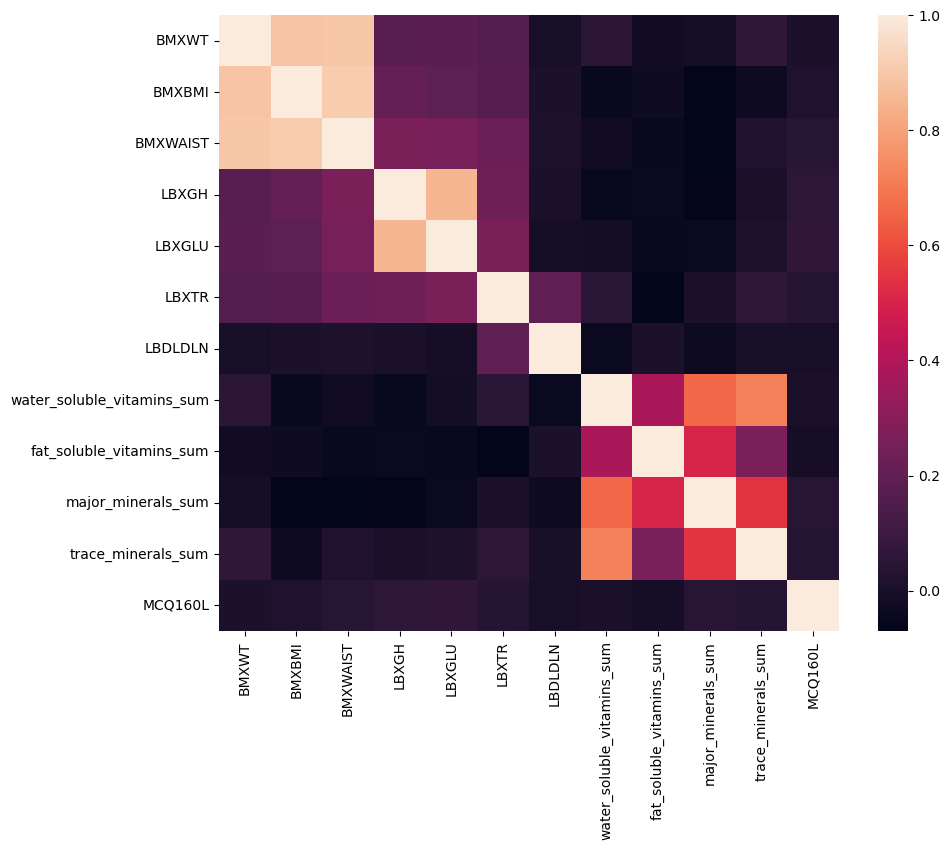

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 8))

mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(df.corr())

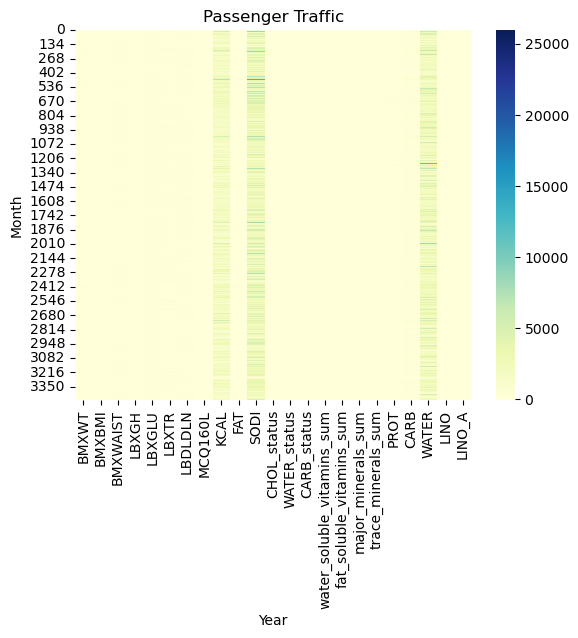

In [22]:
sns.heatmap(visual, cmap="YlGnBu")

# Customize plot
plt.title("Passenger Traffic")
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

[]

<Figure size 1500x1000 with 0 Axes>

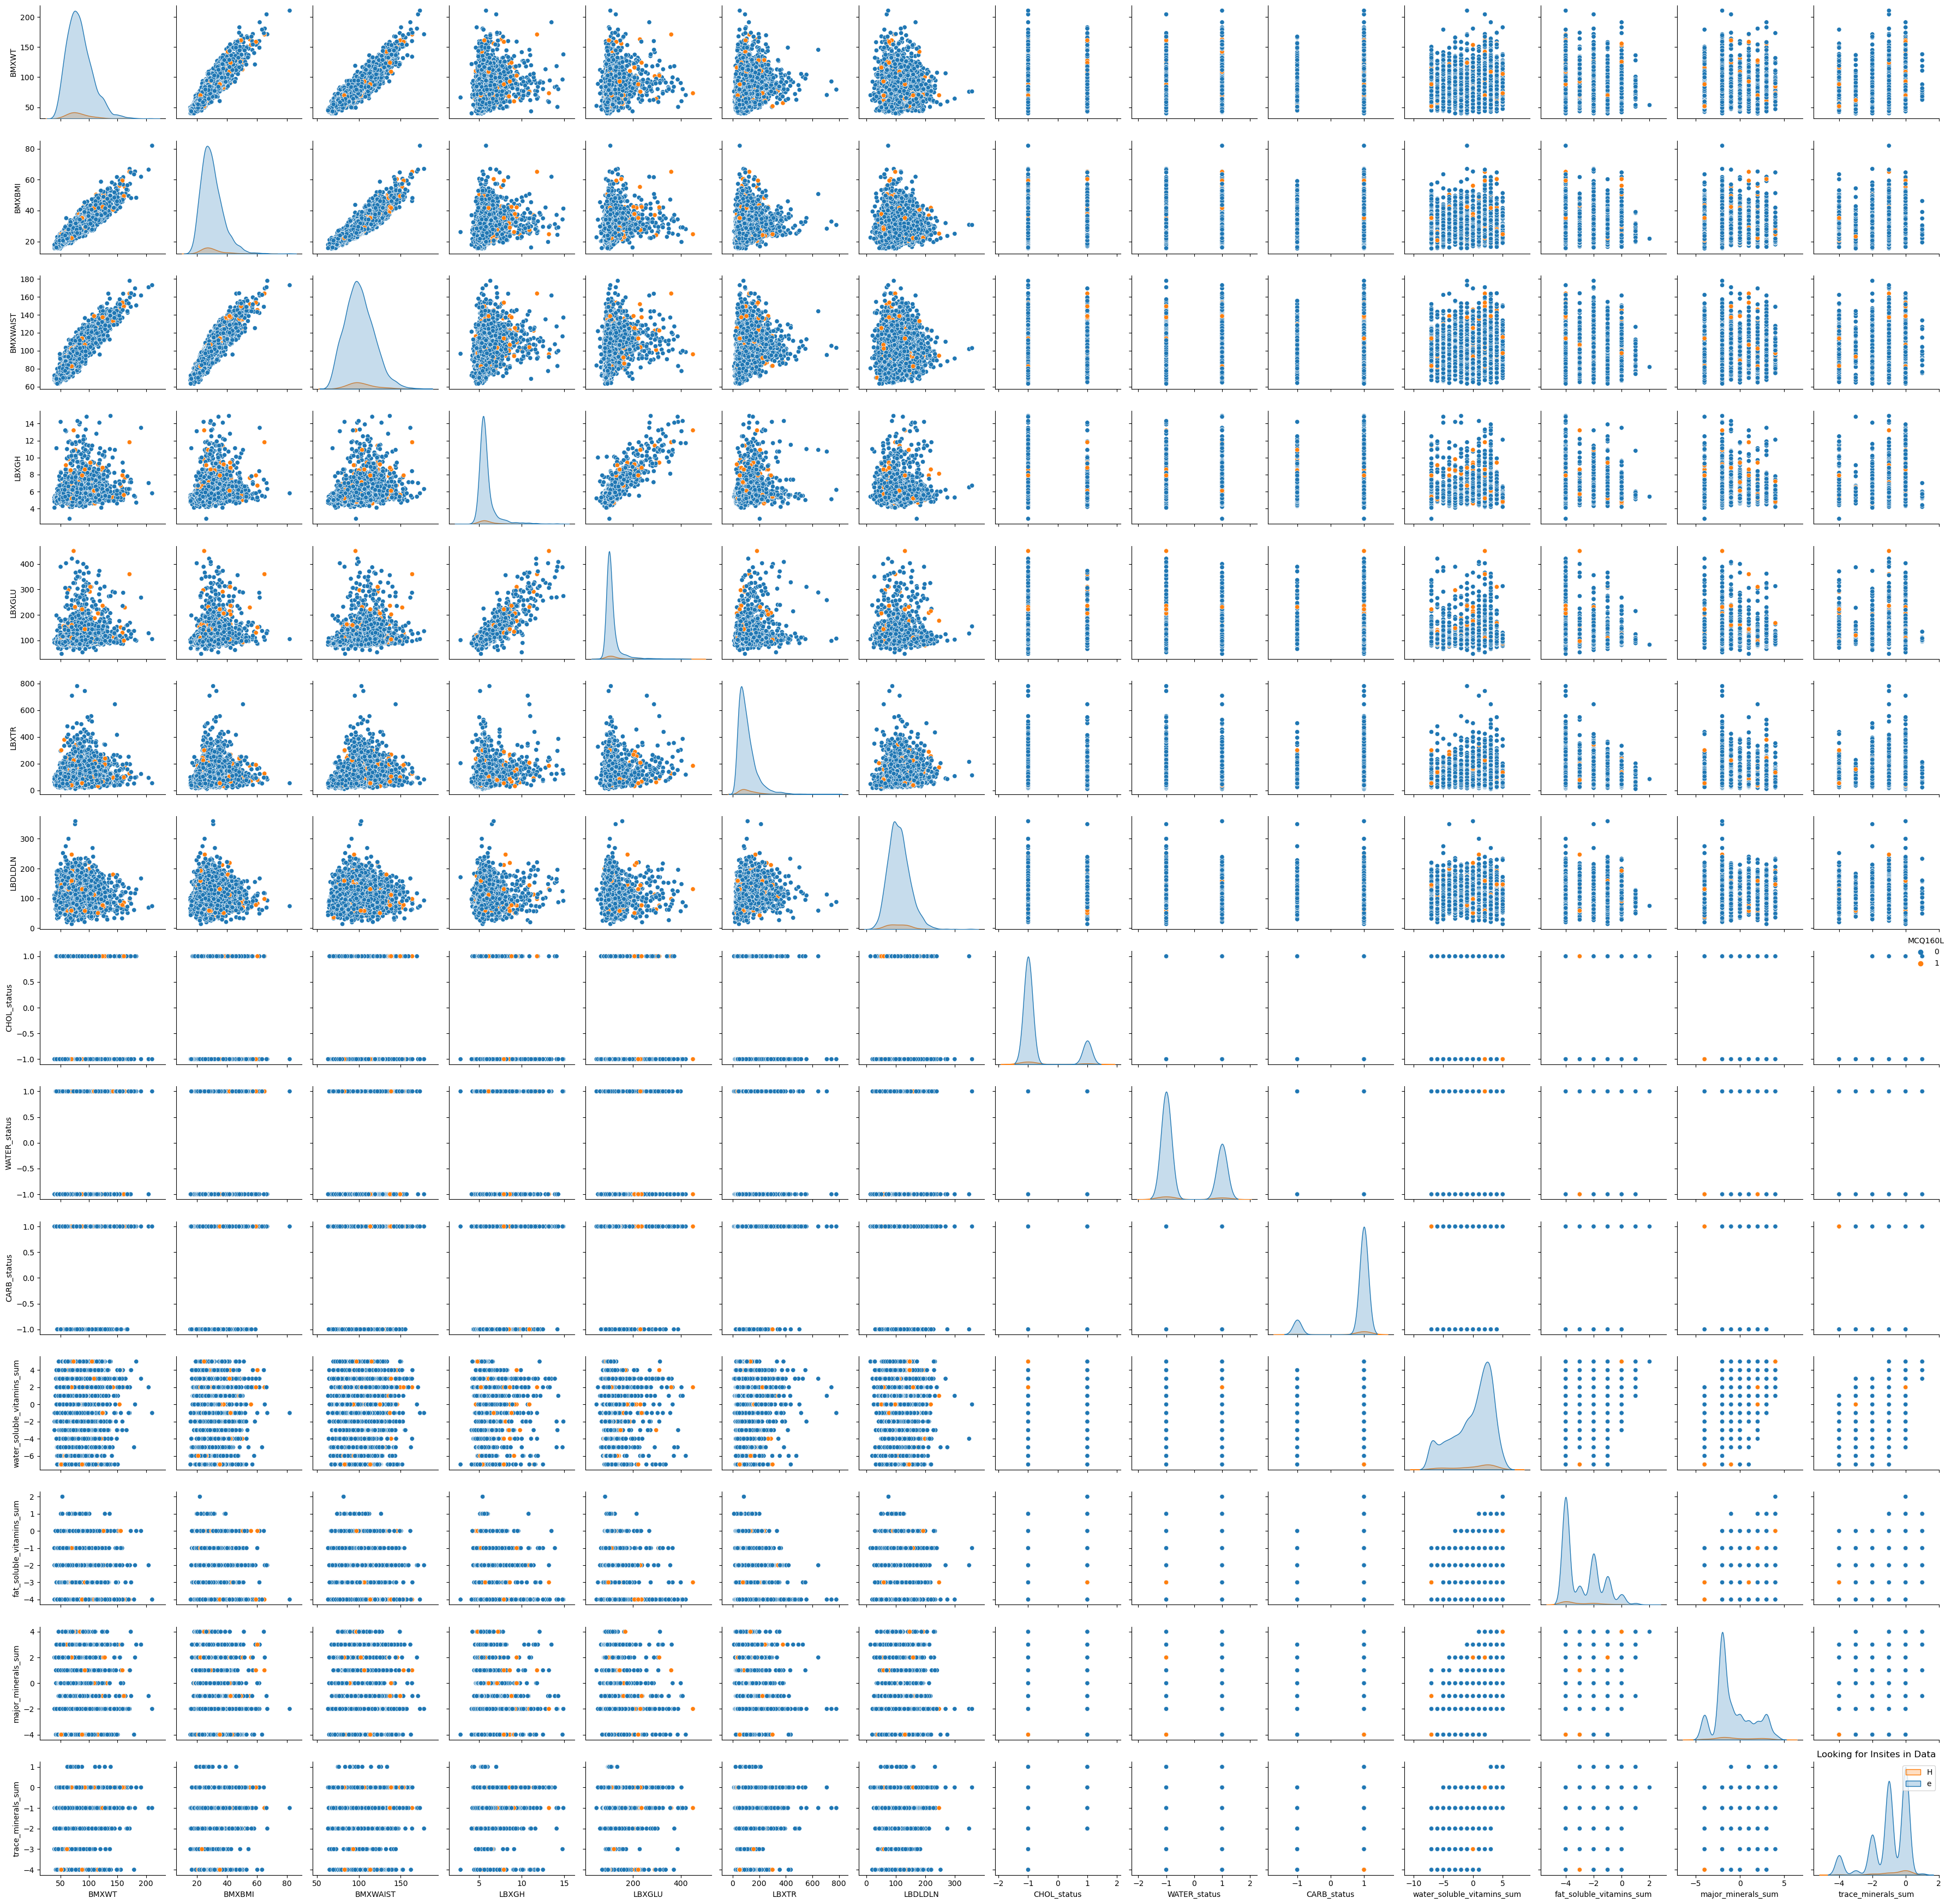

In [32]:
plt.figure(figsize=(15,10))
sns.pairplot(visual1,hue="MCQ160L")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

In [ ]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer = imputer.fit(df[['Weight']])
# df['Weight'] = imputer.transform(df[['Weight']])

In [7]:
from sklearn.preprocessing import LabelEncoder


In [8]:
ordinal_cols = ['CHOL_status', 'WATER_status', 'CARB_status', 'water_soluble_vitamins_sum', 'fat_soluble_vitamins_sum',
                'major_minerals_sum', 'trace_minerals_sum']
df[ordinal_cols] = df[ordinal_cols].astype('string')

KeyError: "['CHOL_status', 'WATER_status', 'CARB_status'] not in index"

In [10]:
df.dtypes

BMXWT                         float64
BMXBMI                        float64
BMXWAIST                      float64
LBXGH                         float64
LBXGLU                          int64
LBXTR                           int64
LBDLDLN                         int64
water_soluble_vitamins_sum      int64
fat_soluble_vitamins_sum        int64
major_minerals_sum              int64
trace_minerals_sum              int64
MCQ160L                         int64
dtype: object

In [11]:
X=df.drop(["MCQ160L"],axis=1)
y=df["MCQ160L"]

In [12]:
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_scaled= s_scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=col_names)   
X_scaled.describe().T

count          mean       std       min  \
BMXWT                       3473.0  6.409196e-16  1.000144 -1.971586   
BMXBMI                      3473.0  2.911578e-16  1.000144 -1.975555   
BMXWAIST                    3473.0 -5.543443e-16  1.000144 -2.191016   
LBXGH                       3473.0 -1.218093e-16  1.000144 -2.689342   
LBXGLU                      3473.0 -2.498242e-17  1.000144 -1.767318   
LBXTR                       3473.0 -9.558211e-18  1.000144 -1.382158   
LBDLDLN                     3473.0  7.766446e-17  1.000144 -2.666703   
water_soluble_vitamins_sum  3473.0 -2.203983e-16  1.000144 -2.145749   
fat_soluble_vitamins_sum    3473.0 -2.313790e-16  1.000144 -0.881162   
major_minerals_sum          3473.0 -1.495429e-16  1.000144 -1.536433   
trace_minerals_sum          3473.0 -3.360039e-16  1.000144 -2.648503   

                                 25%       50%       75%       max  
BMXWT                      -0.710557 -0.144653  0.541561  5.656972  
BMXBMI                     -0.699349 -0.169859  0.508974  7.066503  
BMXWAIST                   -0.707270 -0.087110  0.625783  4.462658  
LBXGH                      -0.492771 -0.229182  0.122269  7.942063  
LBXGLU                     -0.458165 -0.271144  0.049465  9.026512  
LBXTR                      -0.673500 -0.262479  0.361140  9.531169  
LBDLDLN                    -0.679656 -0.100101  0.617444  6.854563  
water_soluble_vitamins_sum -0.611051  0.309768  0.923647  1.537526  
fat_soluble_vitamins_sum   -0.881162 -0.127956  0.625250  3.638075  
major_minerals_sum         -0.579898 -0.579898  0.854905  2.289708  
trace_minerals_sum         -0.016421 -0.016421  0.860940  1.738301

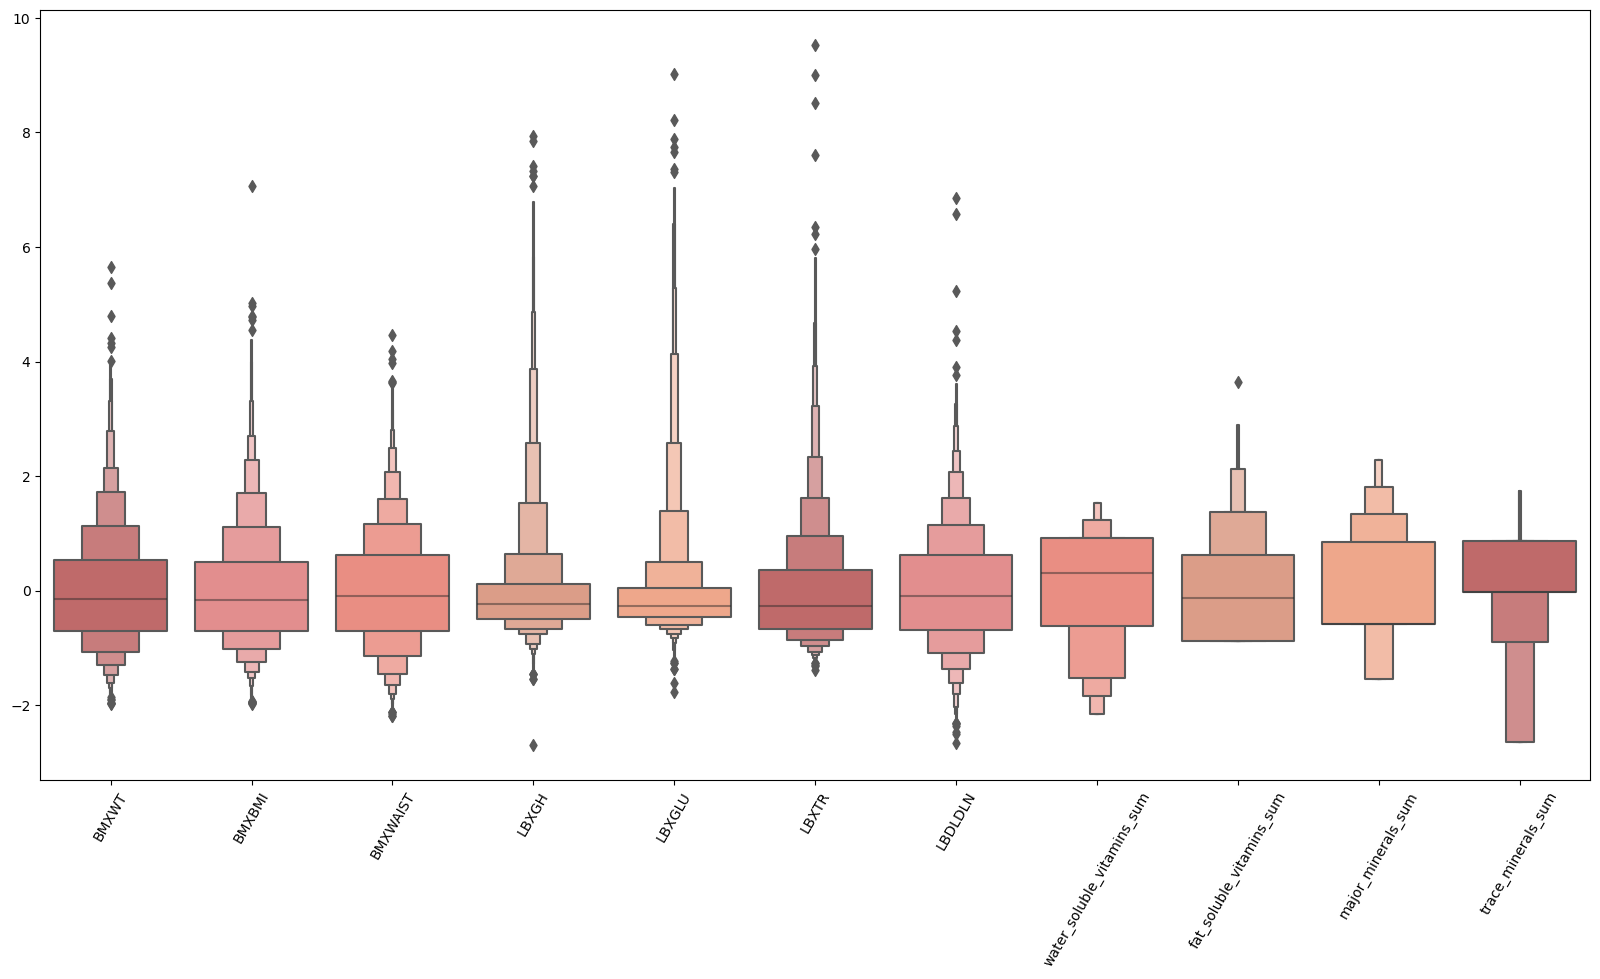

In [13]:
colors =["#CD5C5C","#F08080","#FA8072","#E9967A","#FFA07A"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_scaled,palette = colors)
plt.xticks(rotation=60)
plt.show()

In [52]:
y.describe()

count    3473.000000
mean        0.050389
std         0.218777
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: MCQ160L, dtype: float64

In [14]:
X_train, X_test, y_train,y_test = train_test_split(X_scaled,y,test_size=0.205,random_state=25)

In [15]:
model1=svm.SVC()

# Fitting the model 
model1.fit (X_train, y_train)

# Predicting the test variables
y_pred = model1.predict(X_test)

# Getting the score 
model1.score (X_test, y_test)

0.952247191011236

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       678
           1       0.00      0.00      0.00        34

    accuracy                           0.95       712
   macro avg       0.48      0.50      0.49       712
weighted avg       0.91      0.95      0.93       712



/Users/tom/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tom/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot: >

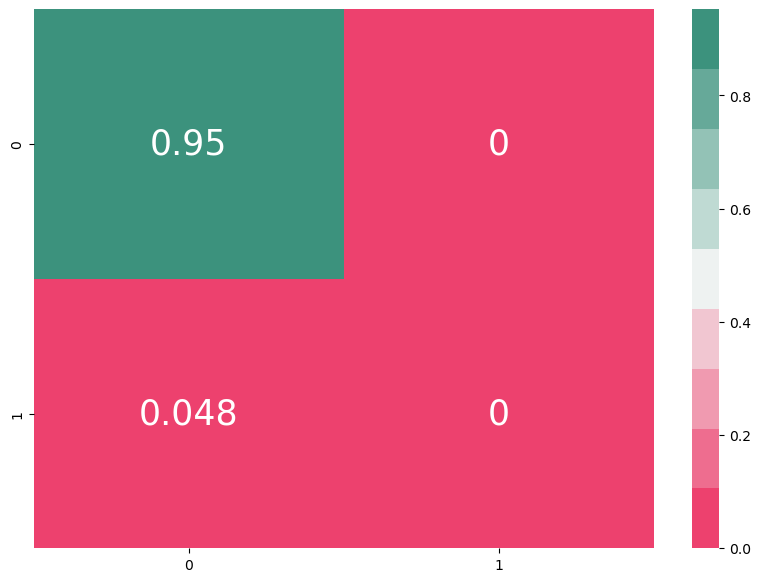

In [17]:
cmap1 = sns.diverging_palette(2, 165, s=80, l=55, n=9)
plt.subplots(figsize=(10,7))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':25})


In [19]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, batch_size = 25, epochs = 80,callbacks=[early_stopping], validation_split=0.25)

Epoch 1/80
83/83 [==============================] - 0s 2ms/step - loss: 0.6601 - accuracy: 0.9454 - val_loss: 0.5869 - val_accuracy: 0.9363
Epoch 2/80
83/83 [==============================] - 0s 1ms/step - loss: 0.3932 - accuracy: 0.9531 - val_loss: 0.2433 - val_accuracy: 0.9363
Epoch 3/80
83/83 [==============================] - 0s 1ms/step - loss: 0.2855 - accuracy: 0.9531 - val_loss: 0.2347 - val_accuracy: 0.9363
Epoch 4/80
83/83 [==============================] - 0s 1ms/step - loss: 0.2526 - accuracy: 0.9531 - val_loss: 0.2324 - val_accuracy: 0.9363
Epoch 5/80
83/83 [==============================] - 0s 1ms/step - loss: 0.2502 - accuracy: 0.9531 - val_loss: 0.2310 - val_accuracy: 0.9363
Epoch 6/80
83/83 [==============================] - 0s 1ms/step - loss: 0.2403 - accuracy: 0.9531 - val_loss: 0.2326 - val_accuracy: 0.9363
Epoch 7/80
83/83 [==============================] - 0s 1ms/step - loss: 0.2435 - accuracy: 0.9531 - val_loss: 0.2286 - val_accuracy: 0.9363
Epoch 8/80
83/83 [==

In [20]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))


val_accuracy is: 93.63%


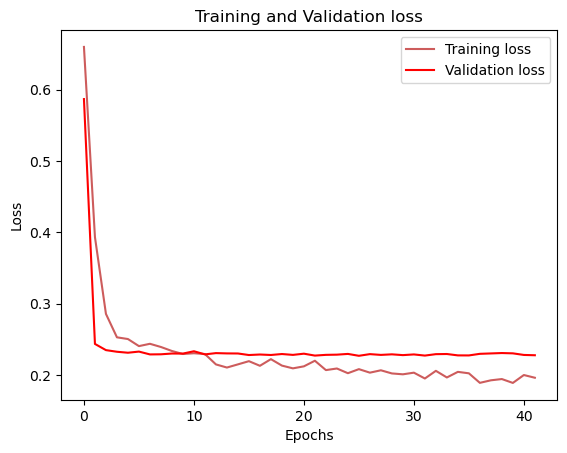

In [21]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()